# Data Science for Business - <font color='orange'>PACMANN</font> AI
# <font color='blue'>Churn Prediction</font>

<img src="img/customer-churn.jpg",width=1250, align="middle">

# Dataset Information

1. State
2. Account Length
3. Area Code
4. Phone
5. Int'l Plan
6. VMail Plan
7. VMail Message
8. Day Mins
9. Day Calls
10. Day Charge
11. Eve Mins
12. Eve Calls
13. Eve Charge
14. Night Mins
15. Night Calls
16. Night Charge
17. Intl Mins
18. Intl Calls
19. Intl Charge
20. CustServ Calls
21. <b>Churn?

## Import Library

In [1]:
import numpy as np
# import library pandas
import pandas as pd
# import library untuk save object
from sklearn.externals import joblib

# Import Dataset

In [2]:
# load data credit_default.csv
data = pd.read_csv("churn.csv")

In [3]:
# menampilkan observasi teratas
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Explore Data

## Data Shape

In [4]:
data.shape # (observasi, kolom)

(3333, 21)

In [5]:
# cek columns dari data
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

## Value Counts and Proportion

In [6]:
# cek proporsi kolom output
data["Churn?"].value_counts(normalize=True)

False.    0.855086
True.     0.144914
Name: Churn?, dtype: float64

## Duplicated Data

In [7]:
# cek bentuk data
data.shape

(3333, 21)

In [8]:
# cek data duplikat
data.duplicated().sum()

0

In [9]:
# drop_duplicates
data = data.drop_duplicates()

In [10]:
# cek bentuk data setelah di drop
data.shape

(3333, 21)

# <font color = 'blue'> FUNCTION: importData

In [11]:
def importData(filepath, sep=',', drop=[]):
    '''
    Fungsi untuk import data dengan format csv,
    ke dalam DataFrame
    
    Input
    ------
    filepath : lokasi data
    sep      : pemisah pada file data
    drop     : kolom yang ingin di drop
    
    Return
    ------
    data     : DataFrame
    '''
    data = pd.read_csv(filepath, sep=sep)
    print("Jumlah data duplicate :", data.duplicated().sum())
    data = data.drop_duplicates()
    print("Datashape setelah drop_duplicate : ", data.shape)
    data = data.drop(drop, axis = 1)
       
    return data

In [12]:
data = importData('churn.csv', sep=',', drop=['Phone'])
data.head()

Jumlah data duplicate : 0
Datashape setelah drop_duplicate :  (3333, 21)


,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
# cek dokumentasi dari fungsi importData
importData?

# Split Input-Output

In [14]:
data.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


data = data_input + data_output <br>
data_input = data - data_output

In [15]:
data_output =  data["Churn?"] # mengambil kolom output
data_input  =  data.drop(["Churn?"], axis = 1)# drop kolom output dari data, tersisa input

In [16]:
data_output.head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn?, dtype: object

In [17]:
data_input.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


# <font color = 'blue'> FUNCTION: extractInputOutput

In [18]:
def extractInputOutput(data, output_col):
    '''
    Fungsi untuk memisahkan input-output
    
    Input
    -----
    data       : DataFrame
    output_col : Kolom output
    
    Return
    ------
    data_input : DataFrame untuk input
    data_output: DataFrame untuk output
    '''
    data_output = data[output_col]
    data_input  = data.drop([output_col], axis=1)

    return data_input, data_output

In [19]:
extractInputOutput?

In [20]:
x, y = extractInputOutput(data, 'Churn?')

In [21]:
x.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [22]:
y.head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn?, dtype: object


# Train Test Split

<img src="img/train_test_split.png",width=1250, align="middle">

In [23]:
# import library train_test_split
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state=123)

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

(2499, 19) (2499,)
(834, 19) (834,)


# Missing Data

## Checking Missing Data

In [26]:
# cek missing data dari x_train
x_train.isnull().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
dtype: int64

# Handling Missing Values
* Imputation 

## Missing Values Imputation

Data imputation adalah proses pengisian data yang memiliki data yang kosong, biasanya diperlihatkan sebagai NaN

Proses tersebut terbagi menjadi 2:
* Numerical Imputation
* Categorical Imputation

# Split Numeric and Categoric

data_input = data_numerical + data_categorical <br>
data_categorical = data - data_numerical

In [27]:
x_train_numerical =  x_train._get_numeric_data() # mengambil kolom numerik secara otomatis
x_train_numerical.head() # cek observasi teratas dari data

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1066,117,510,25,216.0,140,36.72,224.1,69,19.05,267.9,112,12.06,11.8,4,3.19,0
1553,86,415,0,217.8,93,37.03,214.7,95,18.25,228.7,70,10.29,11.3,7,3.05,0
2628,37,415,0,221.0,126,37.57,204.5,110,17.38,118.0,98,5.31,6.8,3,1.84,4
882,130,415,0,162.8,113,27.68,290.3,111,24.68,114.9,140,5.17,7.2,3,1.94,1
984,77,415,0,142.3,112,24.19,306.3,111,26.04,196.5,82,8.84,9.9,1,2.67,1


In [28]:
num_cat = ['Area Code'] # kolom categoric dalam bentuk numeric

In [29]:
# drop num_cat dari data_numerical, jika ada
x_train_numerical = x_train_numerical.drop(num_cat, axis=1)

In [30]:
# cek columns dari data_numerical
x_train_numerical.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [31]:
numerical =  x_train_numerical.columns # kolom numerik

In [32]:
# save column numeric
joblib.dump(numerical, 'numerical_col.pkl')

['numerical_col.pkl']

data_categorical = data - data_numeric

In [33]:
x_train_categorical = x_train.drop(numerical, axis=1) # drop kolom numerik, tersisa kolom kategorik
x_train_categorical.head() # cek head

,State,Area Code,Int'l Plan,VMail Plan
1066,KS,510,no,yes
1553,CO,415,no,no
2628,TN,415,no,no
882,FL,415,no,no
984,NV,415,no,no


In [34]:
categorical =  x_train_categorical.columns# kolom kategorik

In [35]:
# save column categorical
joblib.dump(categorical, 'categorical_col.pkl')

['categorical_col.pkl']

# <font color = 'blue'> FUNCTION: splitNumCat

In [36]:
def splitNumCat(data, num_categorical):
    '''
    Silakan tambahkan dokumentasi untuk fungsi splitNumCat........
    '''
    
    data_num = data._get_numeric_data()
    data_num = data_num.drop(num_categorical, axis = 1)
    
    data_cat = data.drop(data_num.columns, axis = 1)
    

    return data_num, data_cat

In [37]:
x_train_numerical, x_train_categorical = splitNumCat(x_train,
                                                     ['Area Code'])

In [38]:
x_train_numerical.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1066,117,25,216.0,140,36.72,224.1,69,19.05,267.9,112,12.06,11.8,4,3.19,0
1553,86,0,217.8,93,37.03,214.7,95,18.25,228.7,70,10.29,11.3,7,3.05,0
2628,37,0,221.0,126,37.57,204.5,110,17.38,118.0,98,5.31,6.8,3,1.84,4
882,130,0,162.8,113,27.68,290.3,111,24.68,114.9,140,5.17,7.2,3,1.94,1
984,77,0,142.3,112,24.19,306.3,111,26.04,196.5,82,8.84,9.9,1,2.67,1


In [39]:
x_train_categorical.head()

,State,Area Code,Int'l Plan,VMail Plan
1066,KS,510,no,yes
1553,CO,415,no,no
2628,TN,415,no,no
882,FL,415,no,no
984,NV,415,no,no


# Missing Values Imputation

## Missing Values Imputation: Numerical 

In [40]:
# import library untuk imputation
from sklearn.preprocessing import Imputer

In [41]:
# imputation menggunakan nilai median 
imput = Imputer(missing_values='NaN', strategy='median')

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
# fitting imputer ke data untuk menyimpan nilai median tiap kolom
imput.fit(x_train_numerical)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

# <font color = 'blue'> FUNCTION: fitImputNum

In [43]:
# fitImputNum
from sklearn.preprocessing import Imputer
def fitImputNum(data, missing_values='NaN', strategy='median'):
    '''
    Silakan tambahkan dokumentasi....
    '''
    imputer = Imputer(missing_values=missing_values, strategy=strategy)
    imputer.fit(data)
       
    return imputer

In [44]:
imput = fitImputNum(x_train_numerical)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
imput = fitImputNum(x_train_numerical, 
                    missing_values='NaN',
                    strategy='median')

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
# save imputer
joblib.dump(imput, 'imputer.pkl')

['imputer.pkl']

## Imputation Process

In [47]:
# Imputasi kolom numerik
imput.transform(x_train_numerical)

array([[117.  ,  25.  , 216.  , ...,   4.  ,   3.19,   0.  ],
       [ 86.  ,   0.  , 217.8 , ...,   7.  ,   3.05,   0.  ],
       [ 37.  ,   0.  , 221.  , ...,   3.  ,   1.84,   4.  ],
       ...,
       [125.  ,   0.  , 182.3 , ...,   7.  ,   3.13,   2.  ],
       [159.  ,   0.  , 189.1 , ...,   5.  ,   2.81,   1.  ],
       [106.  ,   0.  , 133.7 , ...,   2.  ,   2.89,   1.  ]])

In [48]:
x_train_num_imput = pd.DataFrame(imput.transform(x_train_numerical))# Imputasi, dan membuat ke dalam bentuk DataFrame
x_train_num_imput.head()# cek head

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,117.0,25.0,216.0,140.0,36.72,224.1,69.0,19.05,267.9,112.0,12.06,11.8,4.0,3.19,0.0
1,86.0,0.0,217.8,93.0,37.03,214.7,95.0,18.25,228.7,70.0,10.29,11.3,7.0,3.05,0.0
2,37.0,0.0,221.0,126.0,37.57,204.5,110.0,17.38,118.0,98.0,5.31,6.8,3.0,1.84,4.0
3,130.0,0.0,162.8,113.0,27.68,290.3,111.0,24.68,114.9,140.0,5.17,7.2,3.0,1.94,1.0
4,77.0,0.0,142.3,112.0,24.19,306.3,111.0,26.04,196.5,82.0,8.84,9.9,1.0,2.67,1.0


In [49]:
# memperbaiki column dan index yang hilang
x_train_num_imput.columns = x_train_numerical.columns
x_train_num_imput.index   = x_train_numerical.index
# cek head
x_train_num_imput.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1066,117.0,25.0,216.0,140.0,36.72,224.1,69.0,19.05,267.9,112.0,12.06,11.8,4.0,3.19,0.0
1553,86.0,0.0,217.8,93.0,37.03,214.7,95.0,18.25,228.7,70.0,10.29,11.3,7.0,3.05,0.0
2628,37.0,0.0,221.0,126.0,37.57,204.5,110.0,17.38,118.0,98.0,5.31,6.8,3.0,1.84,4.0
882,130.0,0.0,162.8,113.0,27.68,290.3,111.0,24.68,114.9,140.0,5.17,7.2,3.0,1.94,1.0
984,77.0,0.0,142.3,112.0,24.19,306.3,111.0,26.04,196.5,82.0,8.84,9.9,1.0,2.67,1.0


In [50]:
# cek data kosong
x_train_num_imput.isnull().sum()

Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
dtype: int64

# <font color = 'blue'> FUNCTION: transformNumerical

In [51]:
# transformNumerical
def transformNumerical(data, transformer):
    '''
    Silakan tambahkan dokumentasi......
    '''
    data_num = pd.DataFrame(transformer.transform(data))
    data_num.columns = data.columns
    data_num.index   = data.index  
    
    return data_num

In [52]:
x_train_num_imput = transformNumerical(x_train_numerical, imput)

In [53]:
x_train_num_imput.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1066,117.0,25.0,216.0,140.0,36.72,224.1,69.0,19.05,267.9,112.0,12.06,11.8,4.0,3.19,0.0
1553,86.0,0.0,217.8,93.0,37.03,214.7,95.0,18.25,228.7,70.0,10.29,11.3,7.0,3.05,0.0
2628,37.0,0.0,221.0,126.0,37.57,204.5,110.0,17.38,118.0,98.0,5.31,6.8,3.0,1.84,4.0
882,130.0,0.0,162.8,113.0,27.68,290.3,111.0,24.68,114.9,140.0,5.17,7.2,3.0,1.94,1.0
984,77.0,0.0,142.3,112.0,24.19,306.3,111.0,26.04,196.5,82.0,8.84,9.9,1.0,2.67,1.0


## Missing Value: Categorical

In [54]:
# Cek data kosong pada data_categorical 
x_train_categorical.isnull().sum()

State         0
Area Code     0
Int'l Plan    0
VMail Plan    0
dtype: int64

In [55]:
x_train_cat_imput = x_train_categorical.fillna("KOSONG") # mengisi data kosong dengan nilai KOSONG
x_train_cat_imput.head()# cek head


,State,Area Code,Int'l Plan,VMail Plan
1066,KS,510,no,yes
1553,CO,415,no,no
2628,TN,415,no,no
882,FL,415,no,no
984,NV,415,no,no


In [56]:
x_train_cat_imput.isnull().sum()

State         0
Area Code     0
Int'l Plan    0
VMail Plan    0
dtype: int64

# Plotting with Python

In [57]:
# menggabungkan data_numerical dan data_categorical yang sudah diimputasi dengan data_output
data_plot = pd.concat([x_train_num_imput, 
                       x_train_cat_imput, 
                       y_train], 
                       axis = 1)
data_plot.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State,Area Code,Int'l Plan,VMail Plan,Churn?
1066,117.0,25.0,216.0,140.0,36.72,224.1,69.0,19.05,267.9,112.0,12.06,11.8,4.0,3.19,0.0,KS,510,no,yes,False.
1553,86.0,0.0,217.8,93.0,37.03,214.7,95.0,18.25,228.7,70.0,10.29,11.3,7.0,3.05,0.0,CO,415,no,no,False.
2628,37.0,0.0,221.0,126.0,37.57,204.5,110.0,17.38,118.0,98.0,5.31,6.8,3.0,1.84,4.0,TN,415,no,no,False.
882,130.0,0.0,162.8,113.0,27.68,290.3,111.0,24.68,114.9,140.0,5.17,7.2,3.0,1.94,1.0,FL,415,no,no,False.
984,77.0,0.0,142.3,112.0,24.19,306.3,111.0,26.04,196.5,82.0,8.84,9.9,1.0,2.67,1.0,NV,415,no,no,False.


In [58]:
import matplotlib.pyplot as plt # import matplotlib.pyplot
import seaborn as sns           # import seaborn
%matplotlib inline 
sns.set_style('darkgrid')

In [59]:
# cek head dari data_plot
data_plot.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State,Area Code,Int'l Plan,VMail Plan,Churn?
1066,117.0,25.0,216.0,140.0,36.72,224.1,69.0,19.05,267.9,112.0,12.06,11.8,4.0,3.19,0.0,KS,510,no,yes,False.
1553,86.0,0.0,217.8,93.0,37.03,214.7,95.0,18.25,228.7,70.0,10.29,11.3,7.0,3.05,0.0,CO,415,no,no,False.
2628,37.0,0.0,221.0,126.0,37.57,204.5,110.0,17.38,118.0,98.0,5.31,6.8,3.0,1.84,4.0,TN,415,no,no,False.
882,130.0,0.0,162.8,113.0,27.68,290.3,111.0,24.68,114.9,140.0,5.17,7.2,3.0,1.94,1.0,FL,415,no,no,False.
984,77.0,0.0,142.3,112.0,24.19,306.3,111.0,26.04,196.5,82.0,8.84,9.9,1.0,2.67,1.0,NV,415,no,no,False.


# KDE plot

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


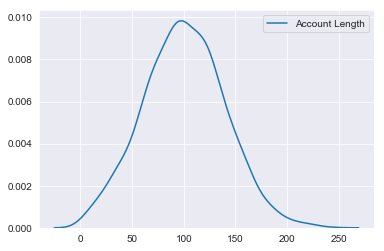

In [60]:
sns.kdeplot(data_plot['Account Length'])

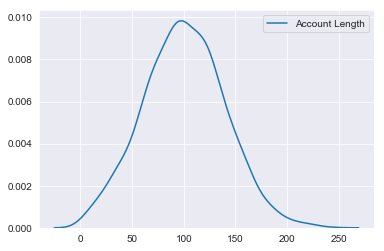

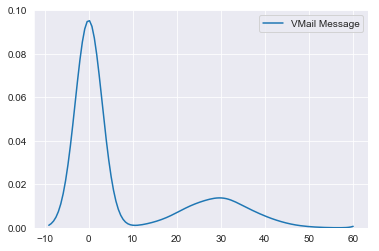

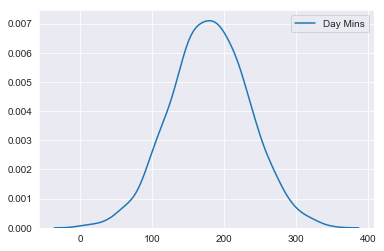

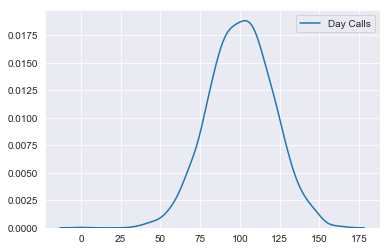

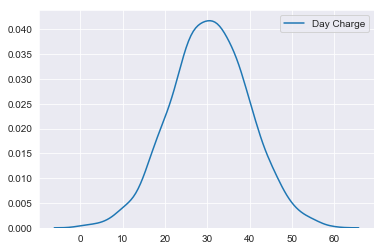

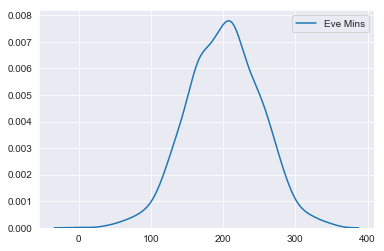

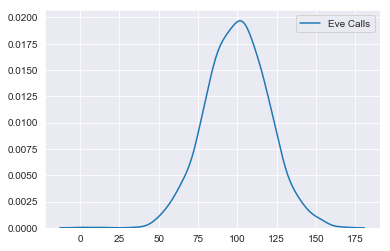

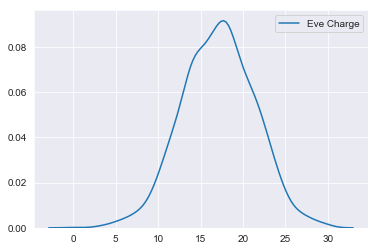

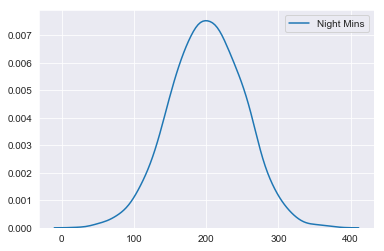

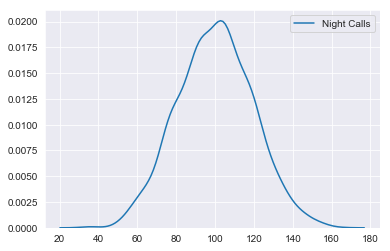

In [61]:
for idx in range(0,10):
    plt.figure()
    sns.kdeplot(data_plot[numerical[idx]])

In [62]:
len(numerical)

15

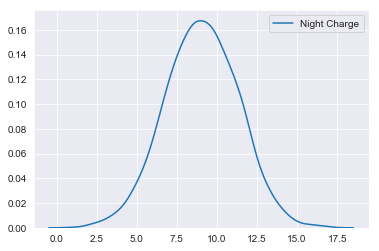

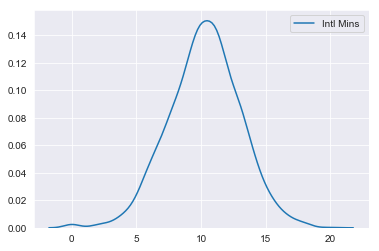

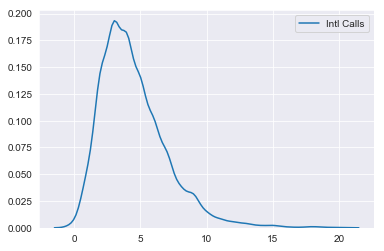

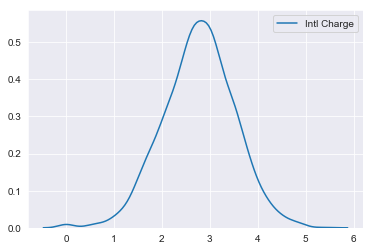

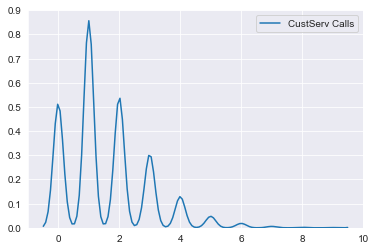

In [63]:
for idx in range(10,15):
    plt.figure()
    sns.kdeplot(data_plot[numerical[idx]])

In [64]:
data_plot['CustServ Calls'].value_counts(normalize=True)

1.0    0.348940
2.0    0.225290
0.0    0.214086
3.0    0.127651
4.0    0.053221
5.0    0.019608
6.0    0.007603
7.0    0.002401
8.0    0.000800
9.0    0.000400
Name: CustServ Calls, dtype: float64

# Box plot

#### Box plot numeric

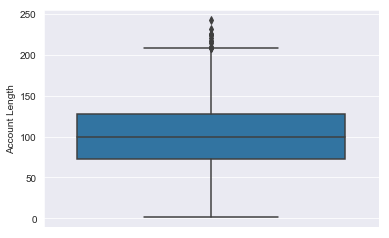

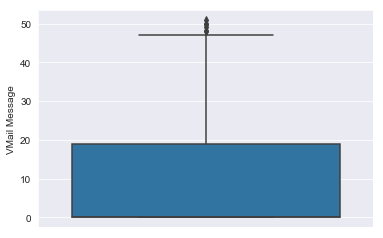

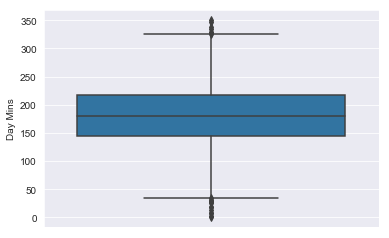

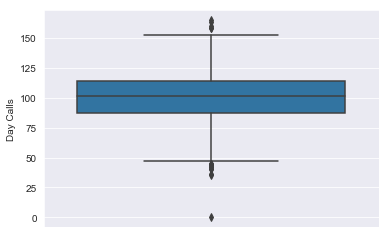

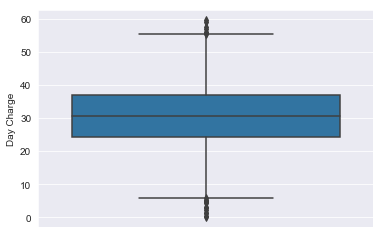

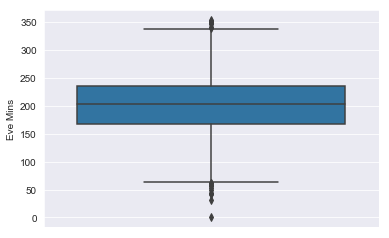

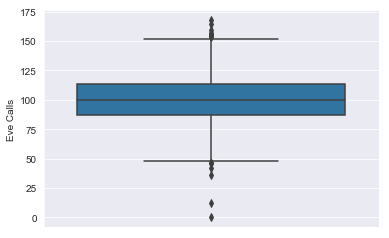

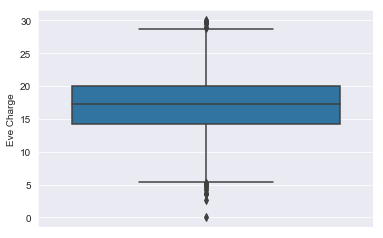

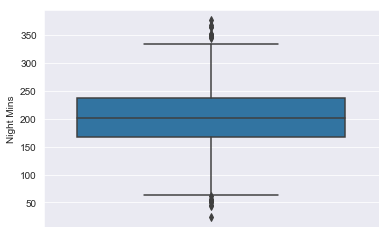

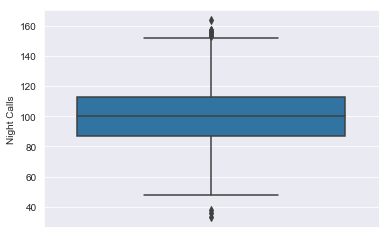

In [65]:
for idx in range(0,10):
    plt.figure()
    sns.boxplot(y = data_plot[numerical[idx]])

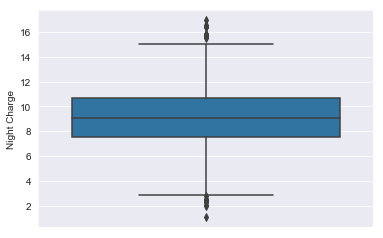

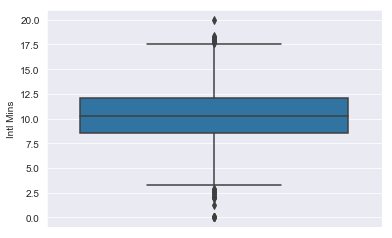

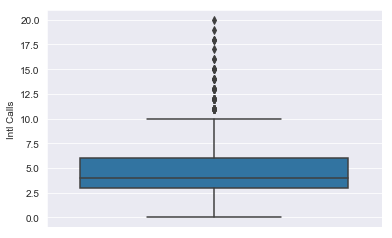

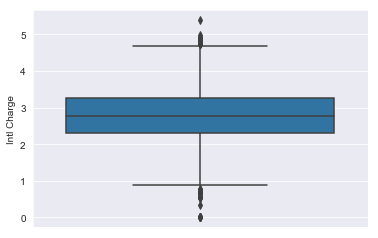

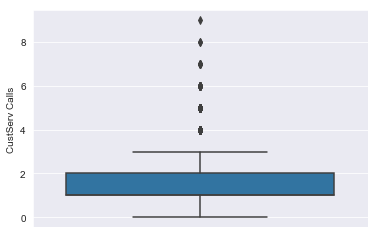

In [66]:
for idx in range(10,15):
    plt.figure()
    sns.boxplot(y = data_plot[numerical[idx]])

In [67]:
data_plot.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State,Area Code,Int'l Plan,VMail Plan,Churn?
1066,117.0,25.0,216.0,140.0,36.72,224.1,69.0,19.05,267.9,112.0,12.06,11.8,4.0,3.19,0.0,KS,510,no,yes,False.
1553,86.0,0.0,217.8,93.0,37.03,214.7,95.0,18.25,228.7,70.0,10.29,11.3,7.0,3.05,0.0,CO,415,no,no,False.
2628,37.0,0.0,221.0,126.0,37.57,204.5,110.0,17.38,118.0,98.0,5.31,6.8,3.0,1.84,4.0,TN,415,no,no,False.
882,130.0,0.0,162.8,113.0,27.68,290.3,111.0,24.68,114.9,140.0,5.17,7.2,3.0,1.94,1.0,FL,415,no,no,False.
984,77.0,0.0,142.3,112.0,24.19,306.3,111.0,26.04,196.5,82.0,8.84,9.9,1.0,2.67,1.0,NV,415,no,no,False.


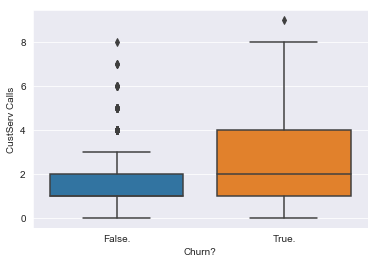

In [68]:
sns.boxplot(x = data_plot['Churn?'], y = data_plot['CustServ Calls'])

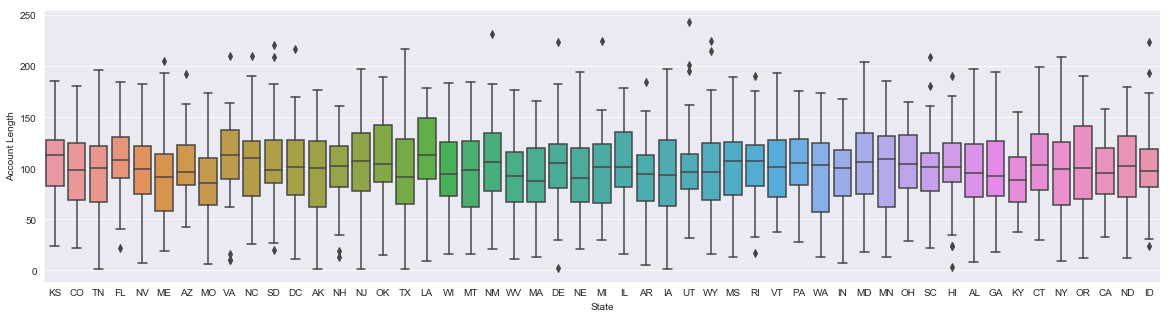

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(x = data_plot['State'], y = data_plot['Account Length'])

In [70]:
data_plot.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State,Area Code,Int'l Plan,VMail Plan,Churn?
1066,117.0,25.0,216.0,140.0,36.72,224.1,69.0,19.05,267.9,112.0,12.06,11.8,4.0,3.19,0.0,KS,510,no,yes,False.
1553,86.0,0.0,217.8,93.0,37.03,214.7,95.0,18.25,228.7,70.0,10.29,11.3,7.0,3.05,0.0,CO,415,no,no,False.
2628,37.0,0.0,221.0,126.0,37.57,204.5,110.0,17.38,118.0,98.0,5.31,6.8,3.0,1.84,4.0,TN,415,no,no,False.
882,130.0,0.0,162.8,113.0,27.68,290.3,111.0,24.68,114.9,140.0,5.17,7.2,3.0,1.94,1.0,FL,415,no,no,False.
984,77.0,0.0,142.3,112.0,24.19,306.3,111.0,26.04,196.5,82.0,8.84,9.9,1.0,2.67,1.0,NV,415,no,no,False.


# Discriminate Output

## KDE plot

In [71]:
numerical

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `

<Figure size 432x288 with 0 Axes>

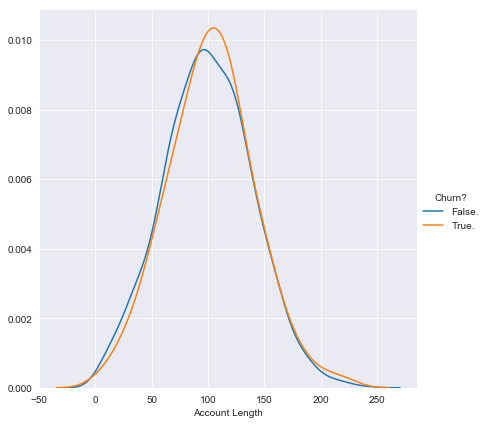

<Figure size 432x288 with 0 Axes>

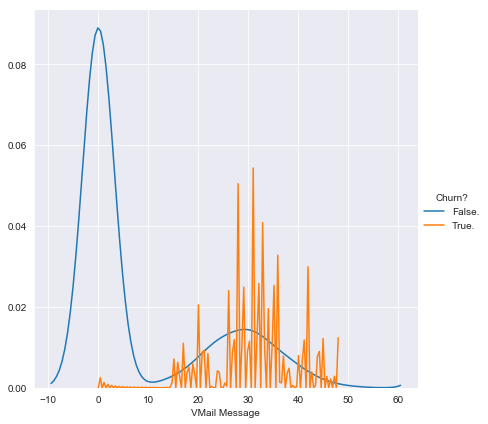

<Figure size 432x288 with 0 Axes>

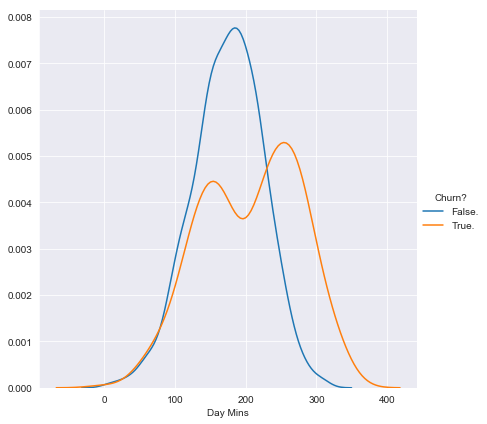

<Figure size 432x288 with 0 Axes>

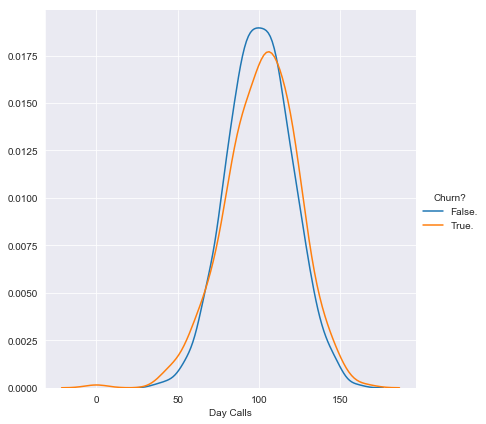

<Figure size 432x288 with 0 Axes>

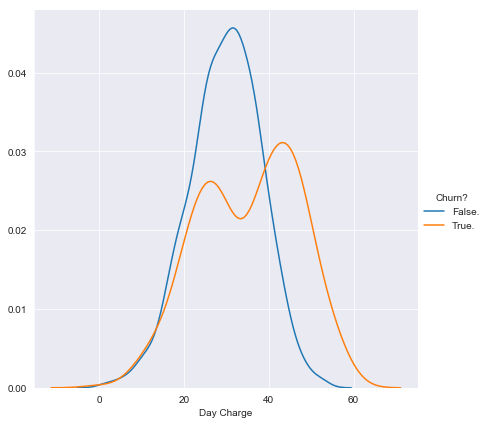

<Figure size 432x288 with 0 Axes>

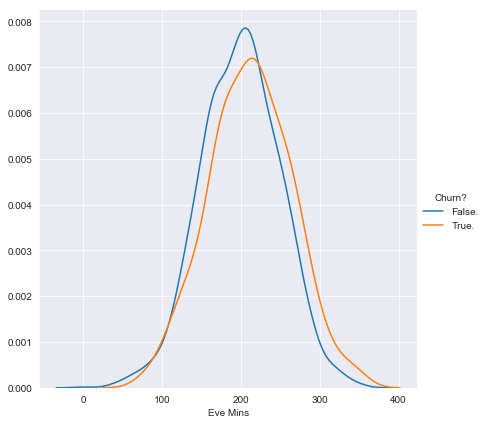

<Figure size 432x288 with 0 Axes>

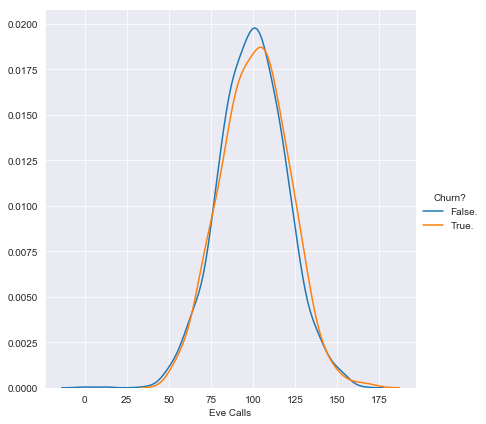

<Figure size 432x288 with 0 Axes>

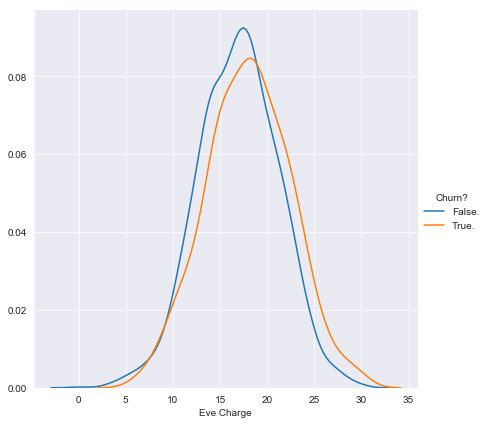

<Figure size 432x288 with 0 Axes>

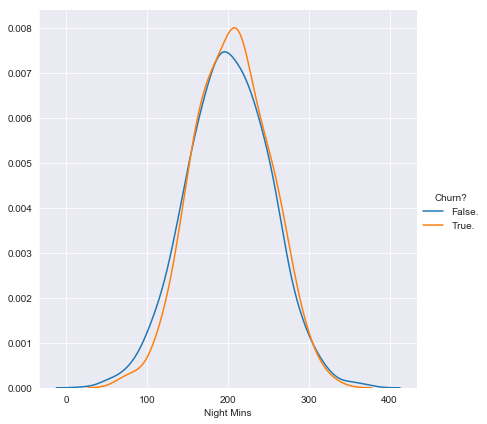

<Figure size 432x288 with 0 Axes>

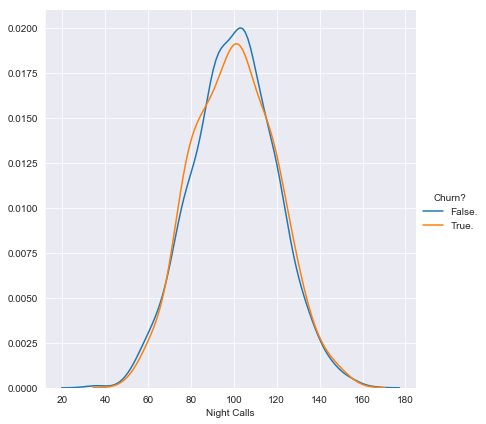

<Figure size 432x288 with 0 Axes>

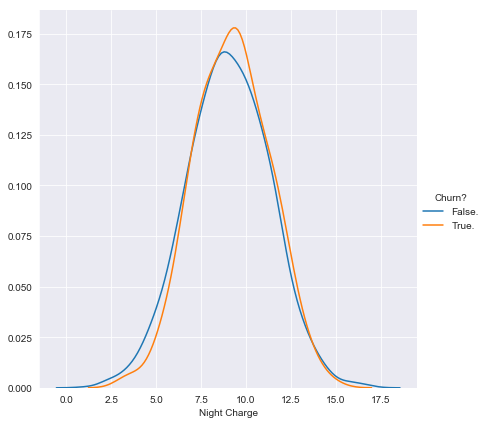

<Figure size 432x288 with 0 Axes>

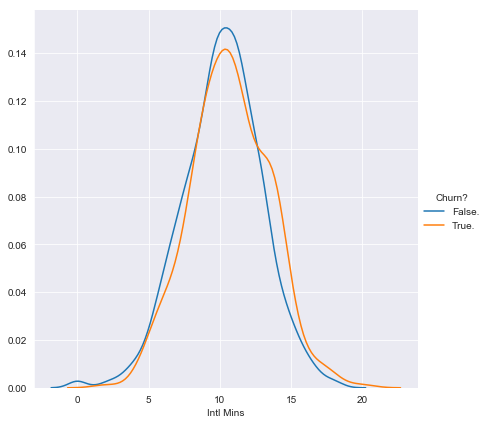

<Figure size 432x288 with 0 Axes>

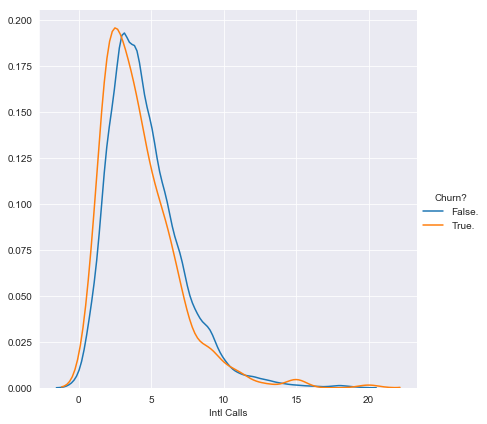

<Figure size 432x288 with 0 Axes>

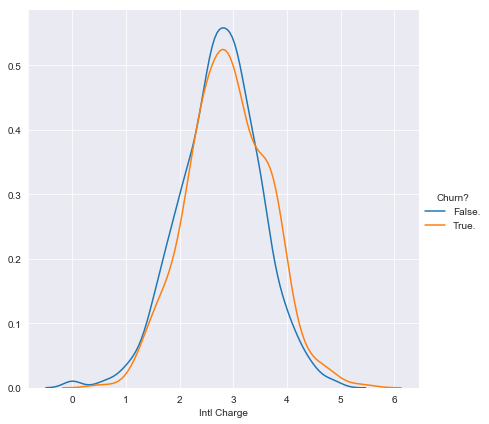

<Figure size 432x288 with 0 Axes>

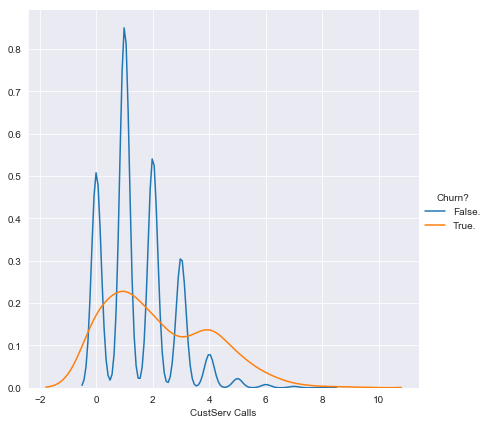

In [72]:
for col in numerical:
    plt.figure()
    ax = sns.FacetGrid(data_plot, hue="Churn?", size=6)
    ax.map(sns.kdeplot, col)
    ax.add_legend()

## Box plot

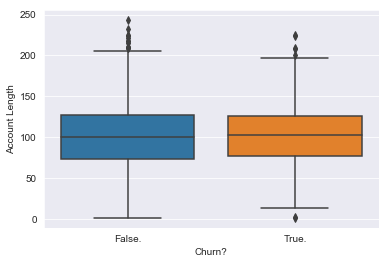

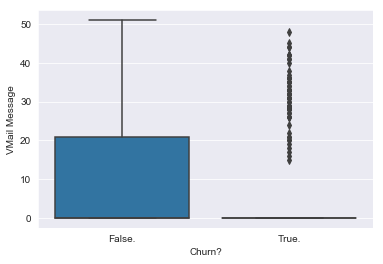

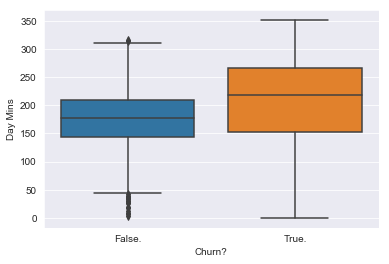

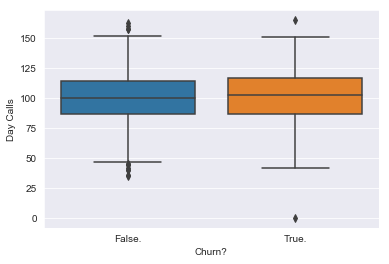

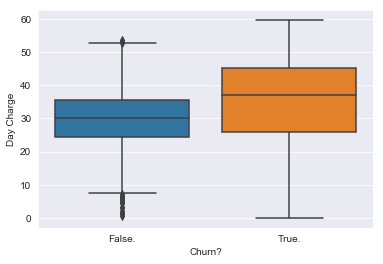

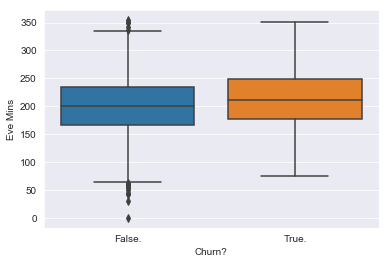

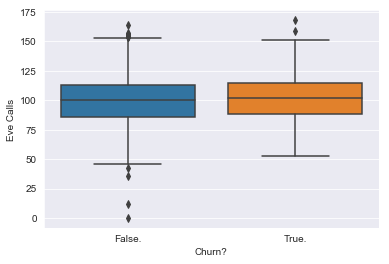

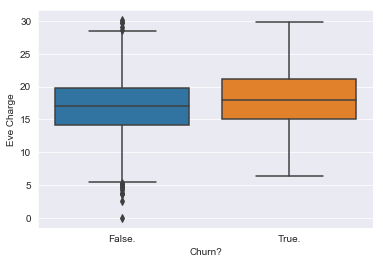

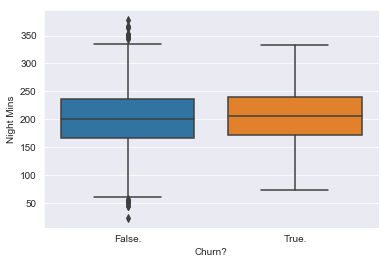

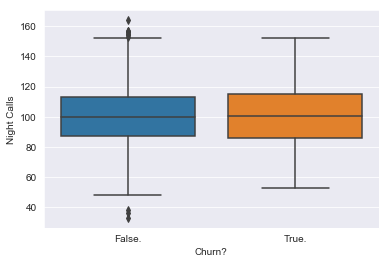

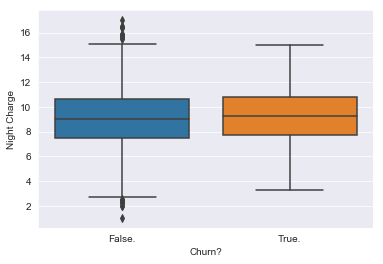

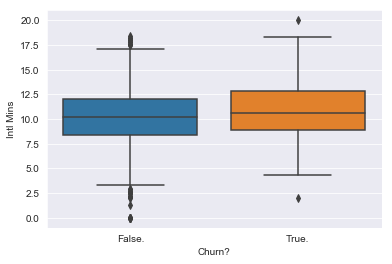

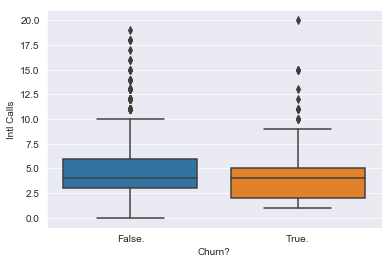

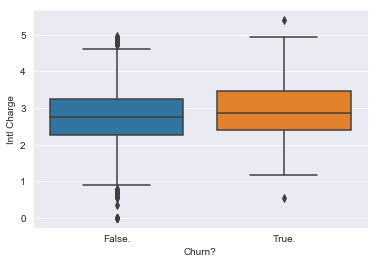

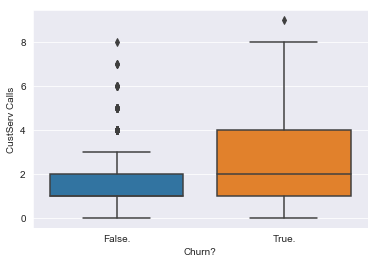

In [73]:
for col in numerical:
    plt.figure()
    sns.boxplot(x = 'Churn?', y = col, data = data_plot)

# Numerical Standardizing


In [74]:
numerical

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [75]:
# import library untuk standardizing
from sklearn.preprocessing import StandardScaler

In [76]:
# buat object untuk standardizing
standardizer = StandardScaler()

In [77]:
# fit standardizer ke kolom numerik
standardizer.fit(x_train_num_imput)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
# save standardizer
joblib.dump(standardizer, 'standardizer.pkl')

['standardizer.pkl']

# <font color = 'blue'> FUNCTION: fitStandardize

In [79]:
from sklearn.preprocessing import StandardScaler
def fitStandardize(data):
    '''
    Silakan tambahkan dokumentasi.......
    '''
    standard = StandardScaler()
    standard.fit(data)
 
    return standard

In [80]:
standardizer = fitStandardize(x_train_num_imput)

In [81]:
joblib.dump(standardizer, 'standardizer.pkl')

['standardizer.pkl']

In [82]:
x_train_num_std = pd.DataFrame(standardizer.transform(x_train_num_imput)) # standardizing kolom numerik
x_train_num_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.422132,1.249874,0.665609,1.957851,0.665555,0.451895,-1.551391,0.452184,1.316807,0.612775,1.318718,0.558119,-0.203834,0.562747,-1.178989
1,-0.360628,-0.586231,0.698711,-0.377054,0.699089,0.265705,-0.244133,0.265761,0.543769,-1.551279,0.543071,0.377650,0.991898,0.375584,-1.178989
2,-1.597894,-0.586231,0.757558,1.262347,0.757504,0.063668,0.510055,0.063026,-1.639273,-0.108576,-1.639260,-1.246575,-0.602412,-1.242043,1.832811
3,0.750387,-0.586231,-0.312731,0.616522,-0.312356,1.763150,0.560334,1.764138,-1.700406,2.055478,-1.700611,-1.102199,-0.602412,-1.108354,-0.426039
4,-0.587881,-0.586231,-0.689724,0.566844,-0.689890,2.080070,0.560334,2.081057,-0.091226,-0.932977,-0.092347,-0.127665,-1.399567,-0.132431,-0.426039


In [83]:
# memperbaiki column dan index yang hilang
x_train_num_std.columns = x_train_num_imput.columns
x_train_num_std.index   = x_train_num_imput.index
x_train_num_std.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1066,0.422132,1.249874,0.665609,1.957851,0.665555,0.451895,-1.551391,0.452184,1.316807,0.612775,1.318718,0.558119,-0.203834,0.562747,-1.178989
1553,-0.360628,-0.586231,0.698711,-0.377054,0.699089,0.265705,-0.244133,0.265761,0.543769,-1.551279,0.543071,0.377650,0.991898,0.375584,-1.178989
2628,-1.597894,-0.586231,0.757558,1.262347,0.757504,0.063668,0.510055,0.063026,-1.639273,-0.108576,-1.639260,-1.246575,-0.602412,-1.242043,1.832811
882,0.750387,-0.586231,-0.312731,0.616522,-0.312356,1.763150,0.560334,1.764138,-1.700406,2.055478,-1.700611,-1.102199,-0.602412,-1.108354,-0.426039
984,-0.587881,-0.586231,-0.689724,0.566844,-0.689890,2.080070,0.560334,2.081057,-0.091226,-0.932977,-0.092347,-0.127665,-1.399567,-0.132431,-0.426039


# <font color = 'blue'> FUNCTION: transformNumerical

In [84]:
x_train_num_std = transformNumerical(x_train_num_imput, standardizer)

In [85]:
x_train_num_std.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1066,0.422132,1.249874,0.665609,1.957851,0.665555,0.451895,-1.551391,0.452184,1.316807,0.612775,1.318718,0.558119,-0.203834,0.562747,-1.178989
1553,-0.360628,-0.586231,0.698711,-0.377054,0.699089,0.265705,-0.244133,0.265761,0.543769,-1.551279,0.543071,0.377650,0.991898,0.375584,-1.178989
2628,-1.597894,-0.586231,0.757558,1.262347,0.757504,0.063668,0.510055,0.063026,-1.639273,-0.108576,-1.639260,-1.246575,-0.602412,-1.242043,1.832811
882,0.750387,-0.586231,-0.312731,0.616522,-0.312356,1.763150,0.560334,1.764138,-1.700406,2.055478,-1.700611,-1.102199,-0.602412,-1.108354,-0.426039
984,-0.587881,-0.586231,-0.689724,0.566844,-0.689890,2.080070,0.560334,2.081057,-0.091226,-0.932977,-0.092347,-0.127665,-1.399567,-0.132431,-0.426039


# Categorical Dummy

In [86]:
# cek head dari data_categorical_imputed
x_train_cat_imput.head()

,State,Area Code,Int'l Plan,VMail Plan
1066,KS,510,no,yes
1553,CO,415,no,no
2628,TN,415,no,no
882,FL,415,no,no
984,NV,415,no,no


In [87]:
x_train_cat_imput.shape

(2499, 4)

In [88]:
x_train_cat_dummy  =  pd.get_dummies(x_train_cat_imput)# buat dummy dari kolom kategorik
# x_train_cat_dummy.head()

In [89]:
x_train_cat_dummy.shape

(2499, 56)

In [90]:
type(x_train_cat_dummy['Area Code'][0])

numpy.int64

In [91]:
x_train_cat_imput['Area Code'] = x_train_cat_imput['Area Code'].astype(str)

In [92]:
type(x_train_cat_imput['Area Code'][0])

str

In [93]:
x_train_cat_dummy  =  pd.get_dummies(x_train_cat_imput)# buat dummy dari kolom kategorik
x_train_cat_dummy.head()

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
1066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1553,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
882,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [94]:
x_train_cat_dummy.shape

(2499, 58)

In [95]:
x_train_num_std.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1066,0.422132,1.249874,0.665609,1.957851,0.665555,0.451895,-1.551391,0.452184,1.316807,0.612775,1.318718,0.558119,-0.203834,0.562747,-1.178989
1553,-0.360628,-0.586231,0.698711,-0.377054,0.699089,0.265705,-0.244133,0.265761,0.543769,-1.551279,0.543071,0.377650,0.991898,0.375584,-1.178989
2628,-1.597894,-0.586231,0.757558,1.262347,0.757504,0.063668,0.510055,0.063026,-1.639273,-0.108576,-1.639260,-1.246575,-0.602412,-1.242043,1.832811
882,0.750387,-0.586231,-0.312731,0.616522,-0.312356,1.763150,0.560334,1.764138,-1.700406,2.055478,-1.700611,-1.102199,-0.602412,-1.108354,-0.426039
984,-0.587881,-0.586231,-0.689724,0.566844,-0.689890,2.080070,0.560334,2.081057,-0.091226,-0.932977,-0.092347,-0.127665,-1.399567,-0.132431,-0.426039


In [96]:
x_train_num_std.shape

(2499, 15)

# Join Data Numerical Standard & Categorical Dummy

In [97]:
# gabungkan data_numerical, data_categorical, dan data_output
x_train_clean = pd.concat([x_train_num_std, x_train_cat_dummy], axis=1)

In [98]:
# cek head dari data
x_train_clean.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
1066,0.422132,1.249874,0.665609,1.957851,0.665555,0.451895,-1.551391,0.452184,1.316807,0.612775,...,0,0,0,0,0,1,1,0,0,1
1553,-0.360628,-0.586231,0.698711,-0.377054,0.699089,0.265705,-0.244133,0.265761,0.543769,-1.551279,...,0,0,0,0,1,0,1,0,1,0
2628,-1.597894,-0.586231,0.757558,1.262347,0.757504,0.063668,0.510055,0.063026,-1.639273,-0.108576,...,0,0,0,0,1,0,1,0,1,0
882,0.750387,-0.586231,-0.312731,0.616522,-0.312356,1.763150,0.560334,1.764138,-1.700406,2.055478,...,0,0,0,0,1,0,1,0,1,0
984,-0.587881,-0.586231,-0.689724,0.566844,-0.689890,2.080070,0.560334,2.081057,-0.091226,-0.932977,...,0,0,0,0,1,0,1,0,1,0


# Preprocess Test

In [99]:
def preprocessTest(data, numerical_col, categorical_col, imputer, standardizer):
    
    # memisahkan numerical dan categorical
    data_numerical   = data[numerical_col]
    data_categorical = data[categorical_col]
    
    # categorical imputation
    data_categorical_imput = data_categorical.fillna("KOSONG")
    
    # dummy categorical
    data_categorical_imput['Area Code'] = data_categorical_imput['Area Code'].astype(str)
    data_categorical_dummy = pd.get_dummies(data_categorical_imput)
   
    # numerical imputation     
    data_numerical_imput = transformNumerical(data_numerical, imputer)
   
    # numerical standardizing
    data_numerical_std = transformNumerical(data_numerical_imput, standardizer)
     
    # join numerical and categorical (clean)
    data_train_clean = pd.concat([data_numerical_std, data_categorical_dummy], axis=1)
    
    return data_train_clean
    

In [100]:
# numerical_col   = x_train_numerical.columns
# categorical_col = x_train_categorical.columns
# imputer         = imput
# standardizer    = standardizer

In [101]:
numerical_col   = joblib.load("numerical_col.pkl")
categorical_col = joblib.load("categorical_col.pkl")
imputer         = joblib.load("imputer.pkl")
standardizer    = joblib.load("standardizer.pkl") 

In [102]:
# preprocess data test dengan function preprocessTest
x_test_clean = preprocessTest(x_test, numerical_col, categorical_col, 
                              imputer, standardizer)
x_test_clean.head() # cek head

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
465,-0.739383,-0.586231,-0.029528,0.616522,-0.030017,-0.663266,-0.294412,-0.664025,-0.375199,0.561250,...,0,0,0,0,1,0,0,1,1,0
2416,0.321131,-0.586231,-0.437782,2.007530,-0.437840,1.099600,-1.400553,1.100005,-0.509297,1.179552,...,0,0,0,0,0,1,1,0,1,0
1785,-1.395892,1.543651,-0.809258,0.169413,-0.808883,0.420203,0.057542,0.419560,0.679840,-0.417726,...,0,0,0,0,0,1,1,0,0,1
1316,-2.279653,-0.586231,0.058744,0.119734,0.058688,0.267685,-1.149157,0.268092,0.104006,-1.396703,...,0,0,0,0,0,1,1,0,1,0
446,-0.310127,-0.586231,-0.763283,0.765559,-0.763449,0.687604,1.917871,0.687544,-0.434360,0.509725,...,0,0,0,0,0,1,1,0,1,0


# Modelling with Machine Learning


## Benchmark

In [103]:
# hitung benchmark pada data_train
y_train.value_counts(normalize=True)

False.    0.85114
True.     0.14886
Name: Churn?, dtype: float64

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
logreg = LogisticRegression()

In [106]:
logreg.fit(x_train_clean, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
logreg.score(x_train_clean, y_train)

0.8639455782312925

In [108]:
logreg.score(x_test_clean, y_test)

0.8741007194244604

In [109]:
benchmark = y_train.value_counts(normalize = True)[0]

In [110]:
benchmark

0.851140456182473

In [111]:
logreg.score(x_test_clean, y_test) - benchmark

0.02296026324198741

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
random_forest = RandomForestClassifier(random_state=123,
                                       n_estimators = 1000 )

In [114]:
random_forest.fit(x_train_clean, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [115]:
random_forest.score(x_train_clean, y_train)

1.0

In [116]:
random_forest.score(x_test_clean, y_test) - benchmark

0.10449503542424166

In [117]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


In [118]:
grad_boost = GradientBoostingClassifier(random_state=123,
                                        n_estimators=1000)

In [119]:
grad_boost.fit(x_train_clean, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=123,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [120]:
def train_algo(algo, x_train, y_train, x_test, y_test):
    algo.fit(x_train, y_train)
    print("Training Accuracy :", algo.score(x_train, y_train))
    print("Test     Accuracy :", algo.score(x_test, y_test))
    
    return algo

In [121]:
random_forest_fitted = train_algo(random_forest,
           x_train_clean,
           y_train,
           x_test_clean,
           y_test)

Training Accuracy : 1.0
Test     Accuracy : 0.9556354916067147


In [122]:
joblib.dump(random_forest_fitted, "rf.pkl")

['rf.pkl']

In [123]:
rf = joblib.load('rf.pkl')

In [124]:
rf.predict_proba(x_test_clean)

array([[0.209, 0.791],
       [0.956, 0.044],
       [0.992, 0.008],
       ...,
       [0.95 , 0.05 ],
       [0.953, 0.047],
       [0.862, 0.138]])

# What is The Good Measure of <i>“Model Quality”</i> from Machine Learning Standpoint?

## <font color='blue'> Confusion Matrix

<img src="img/confusion_matrix.png", align="middle">

<img src="img/precision_recall.png", align="middle">

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_train, random_forest.predict(x_train_clean))

array([[2127,    0],
       [   0,  372]], dtype=int64)

In [127]:
confusion_matrix(y_test, random_forest.predict(x_test_clean))

array([[715,   8],
       [ 29,  82]], dtype=int64)

In [128]:
confusion_matrix(y_train, logreg.predict(x_train_clean))

array([[2073,   54],
       [ 286,   86]], dtype=int64)

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test,
                            random_forest.predict(x_test_clean)))

              precision    recall  f1-score   support

      False.       0.96      0.99      0.97       723
       True.       0.91      0.74      0.82       111

   micro avg       0.96      0.96      0.96       834
   macro avg       0.94      0.86      0.90       834
weighted avg       0.95      0.96      0.95       834



<img src="img/model_complexity.png", align="middle">

<img src="img/overfitting_linear.png", align="middle">

<img src="img/bias_variance_tradeoff.png", align="middle">

<img src="img/bias_variance.png", align="middle">

<img src="img/underfitting_vs_overfitting.png", align="middle">

# Validation Set Approach & K-Fold Cross Validation

<img src="img/validation_set.png", align="middle">

<img src="img/k_fold.png", align="middle">

# RandomSearchCV

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
param = {'C': [10000, 1000, 100, 10,
               1, 0.1, 0.01, 0.001]}

def logreg_cv(param, x_train, y_train):
    logreg = LogisticRegression(random_state = 123)
    
    logregCV = RandomizedSearchCV(logreg,
                       param_distributions = param,
                       n_iter= 3,
                       cv = 5,
                       random_state = 123,
                       verbose = 10)
    logregCV.fit(x_train, y_train)
    
    return logregCV

In [133]:
logreg_cv_fitted = logreg_cv(param,
                             x_train_clean,
                             y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=10000 .........................................................
[CV] ................ C=10000, score=0.8682634730538922, total=   0.0s
[CV] C=10000 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=10000, score=0.846307385229541, total=   0.0s
[CV] C=10000 .........................................................
[CV] ................ C=10000, score=0.8537074148296593, total=   0.0s
[CV] C=10000 .........................................................
[CV] ................ C=10000, score=0.8617234468937875, total=   0.0s
[CV] C=10000 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=10000, score=0.8416833667334669, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ................. C=1000, score=0.8682634730538922, total=   0.0s
[CV] C=1000 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, score=0.846307385229541, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ................. C=1000, score=0.8517034068136272, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ................. C=1000, score=0.8617234468937875, total=   0.0s

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1000 ..........................................................
[CV] .................. C=1000, score=0.843687374749499, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.8682634730538922, total=   0.0s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=10, score=0.8483033932135728, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.8537074148296593, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.8617234468937875, total=   0.0s
[CV] C=10 ............................................................
[CV] .................... C=10, score=0.843687374749499, total=   0.0s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.3s finished
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
logreg_cv_fitted.best_params_

{'C': 10}

In [135]:
# Accuracy di cross validation
logreg_cv_fitted.best_score_

0.8551420568227291

In [136]:
# Accuracy di training 
logreg_cv_fitted.score(x_train_clean, y_train)

0.8643457382953181

In [137]:
logreg_cv_fitted.score(x_test_clean, y_test)

0.8752997601918465

In [138]:
param = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21],
         'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75], 
         'n_estimators': [100, 200, 300, 500, 1000]}

def random_forest_cv(param, x_train, y_train):
    random_forest = RandomForestClassifier(random_state = 123)
    
    random_forestCV = RandomizedSearchCV(random_forest,
                       param_distributions = param,
                       n_iter= 20,
                       cv = 5,
                       random_state = 123,
                       verbose = 10,
                        n_jobs = -1)
    random_forestCV.fit(x_train, y_train)
    
    return random_forestCV

In [139]:
random_forest_cv_fitted = random_forest_cv(param,
                                           x_train_clean,
                                           y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.3min finished


In [140]:
random_forest_cv_fitted.best_params_

{'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 0.5}

In [141]:
random_forest_cv_fitted.score(x_test_clean, y_test)

0.9496402877697842

In [142]:
joblib.dump(random_forest_cv_fitted, "rf_cv.pkl")

['rf_cv.pkl']

In [143]:
random_forest = RandomForestClassifier(max_features = 0.5,
                                       min_samples_leaf = 5,
                                       n_estimators = 100,
                                        random_state = 123)

In [144]:
random_forest.fit(x_train_clean, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [145]:
joblib.dump(random_forest, "rf_best.pkl")

['rf_best.pkl']

In [146]:
random_forest.fit(x_train_clean, y_train)
random_forest.score(x_train_clean, y_train)

0.9683873549419768